<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Independent-project-completed-for-LaunchCode's-CoderGirl---Data-Science-program." data-toc-modified-id="Independent-project-completed-for-LaunchCode's-CoderGirl---Data-Science-program.-NaN">Independent project completed for LaunchCode's CoderGirl - Data Science program.</a></span><ul class="toc-item"><li><span><a href="#The-purpose-of-this-project-is-to-perform-exploratory-data-analysis,-then-implement-and-analyse-the-performance-of-machine-learning-models-on-data-from-UCI's-Heart-Disease-dataset." data-toc-modified-id="The-purpose-of-this-project-is-to-perform-exploratory-data-analysis,-then-implement-and-analyse-the-performance-of-machine-learning-models-on-data-from-UCI's-Heart-Disease-dataset.-NaN.1">The purpose of this project is to perform exploratory data analysis, then implement and analyse the performance of machine learning models on data from <a href="https://www.kaggle.com/ronitf/heart-disease-uci/version/1" target="_blank">UCI's Heart Disease dataset</a>.</a></span></li></ul></li><li><span><a href="#I.-EDA" data-toc-modified-id="I.-EDA-NaN">I. EDA</a></span><ul class="toc-item"><li><span><a href="#i.-Importing-data-and-libraries" data-toc-modified-id="i.-Importing-data-and-libraries-NaN.1">i. Importing data and libraries</a></span></li><li><span><a href="#ii.-Cleaning-the-data" data-toc-modified-id="ii.-Cleaning-the-data-NaN.2">ii. Cleaning the data</a></span></li><li><span><a href="#iii.-Visualizations" data-toc-modified-id="iii.-Visualizations-NaN.3">iii. Visualizations</a></span><ul class="toc-item"><li><span><a href="#Correlation-plot-of-continuous-features-by-heart-disease" data-toc-modified-id="Correlation-plot-of-continuous-features-by-heart-disease-NaN.3.1">Correlation plot of continuous features by heart disease</a></span></li><li><span><a href="#Correlation-heatmap-of-all-features" data-toc-modified-id="Correlation-heatmap-of-all-features-NaN.3.2">Correlation heatmap of all features</a></span></li><li><span><a href="#Distribution-of-age-and-sex" data-toc-modified-id="Distribution-of-age-and-sex-NaN.3.3">Distribution of age and sex</a></span></li><li><span><a href="#Pain-type-x-heart-disease" data-toc-modified-id="Pain-type-x-heart-disease-NaN.3.4">Pain type x heart disease</a></span></li><li><span><a href="#Maximum-heart-rate-x-heart-disease" data-toc-modified-id="Maximum-heart-rate-x-heart-disease-NaN.3.5">Maximum heart rate x heart disease</a></span></li><li><span><a href="#Exercised-induced-angina-x-heart-disease" data-toc-modified-id="Exercised-induced-angina-x-heart-disease-NaN.3.6">Exercised-induced angina x heart disease</a></span></li><li><span><a href="#ST-curve-depression-x-heart-disease" data-toc-modified-id="ST-curve-depression-x-heart-disease-NaN.3.7">ST curve depression x heart disease</a></span></li><li><span><a href="#Major-vessels-under-fluoroscopy-x-heart-disease" data-toc-modified-id="Major-vessels-under-fluoroscopy-x-heart-disease-NaN.3.8">Major vessels under fluoroscopy x heart disease</a></span></li></ul></li><li><span><a href="#iv.-EDA-findings" data-toc-modified-id="iv.-EDA-findings-NaN.4">iv. EDA findings</a></span></li></ul></li><li><span><a href="#II.-Modeling" data-toc-modified-id="II.-Modeling-NaN">II. Modeling</a></span><ul class="toc-item"><li><span><a href="#i.-Importing-data-and-libraries" data-toc-modified-id="i.-Importing-data-and-libraries-NaN.1">i. Importing data and libraries</a></span></li><li><span><a href="#ii.-Modeling-with-unaltered-features" data-toc-modified-id="ii.-Modeling-with-unaltered-features-NaN.2">ii. Modeling with unaltered features</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-NaN.2.1">Decision Tree Classifier</a></span></li></ul></li></ul></li></ul></div>

# Independent project completed for LaunchCode's CoderGirl - Data Science program.

## The purpose of this project is to perform exploratory data analysis, then implement and analyse the performance of machine learning models on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#).

# I. EDA

## i. Importing data and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
sns.set()

xkcd = sns.xkcd_palette
custom = xkcd(colors= ['sage green', 'coral', 'bluegrey', 'charcoal'])
char_sage = xkcd(colors=['charcoal', 'sage green'])
char_coral = xkcd(colors=['charcoal', 'coral'])
char_blue = xkcd(colors=['charcoal', 'bluegrey'])
blue_sage = xkcd(colors=['greyblue', 'sage green'])

In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The data is a mix of categorical and continuous values. The feature names are not very informative, so I will rename the features according to information provided on Kaggle:

> 1. age
> 2. sex (1=male, 0=female)
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved through exercise
> 9. exercise induced angina (1=true, 0=false)
> 10. oldpeak = ST depression (measured in mm) induced by exercise relative to rest
> 11. the slope of the peak of the ST segment
> 12. number of major vessels (0-4) colored by fluoroscopy
> 13. thal: 3 = minor; 6 = intermediate; 7 = major

The 'target' attribute indicates whether the subject has heart disease or not (1=true, 0=false).

The following information was not provided on Kaggle, but was found through some quick online research on cardiological studies:

> 3. Chest pain type: 1=anginal, 2=atypical, 3=non-anginal, 4=asymptomatic
> 7. Resting ECG results: 0=probable or definite left ventricular hypterophy, 1=normal, 2=having ST-wave abnormality
> 11. ST peak during exercise: 0=downsloping, 1=flat, 2=upsloping
> 10. ST depression refers to the deviation of the ST segment, recorded by an ECG, which is abnormally low.
> 13. 'Thal' is short for Thalassemia, which is an inherited blood disorder that causes one's blood to have lower hemoglobin than normal, thus carrying less oxygen. It can have varying degrees of severity (see above).

In [4]:
heart.columns = ['age', 'sex', 'pain_type', 'restingBP', 'chol', 'fasting_sugar', 'resting_ecg', 'maxHR', 'exercise_angina', 'ST_depression', 'ST_peak_slope', 'vessels_fluoro', 'thal_severity', 'heart_disease']
heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ii. Cleaning the data

In [5]:
heart.describe()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Before I continue with any data cleaning, I want to make sure I'm not missing any values or have any other basic data issues:

1.  I can see from the counts of each feature that no values are missing.
2.  I can also see from a brief look over the columns that there are somewhat significant outliers in the restingBP, chol, and ST_depression feature columns.
3.  It is hard to tell if any duplicates exist from the description view of the data, so I will have to do a check for those.

In [6]:
# Check for outliers
restingBP_outliers = heart[heart['restingBP'] > heart['restingBP'].mean() + 3 * heart['restingBP'].std()]
chol_outliers = heart[heart['chol'] > heart['chol'].mean() + 3 * heart['chol'].std()]
ST_depression_outliers = heart[heart['ST_depression'] > heart['ST_depression'].mean() + 3 * heart['ST_depression'].std()]
print(" RestingBP Outliers: ", restingBP_outliers.index.tolist(), "\n",
     "Chol Outliers: ", chol_outliers.index.tolist(), "\n",
      "ST_depression Outliers: ", ST_depression_outliers.index.tolist())

 RestingBP Outliers:  [223, 248] 
 Chol Outliers:  [28, 85, 220, 246] 
 ST_depression Outliers:  [204, 221]


In [7]:
# Drop outliers
heart.drop([223, 248, 28, 85, 220, 246, 204, 221], inplace=True)

In [8]:
# Check for duplicates
heart[heart.duplicated(keep=False)]

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
# Drop duplicates
heart = heart.drop_duplicates()

In [10]:
# View changes
heart.describe()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.275510,0.693878,0.972789,130.996599,243.857143,0.146259,0.537415,149.540816,0.326531,0.989456,1.411565,0.697279,2.299320,0.551020
std,9.093501,0.461667,1.034857,16.815501,45.679474,0.353968,0.526073,22.915858,0.469743,1.074300,0.604874,0.994967,0.611773,0.498238
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


I chose to drop outliers greater than the mean plus 3x the standard deviation, as well as the duplicate row of data, so as to prevent bias and ensure greater reliability of the models.

## iii. Visualizations

### Correlation plot of continuous features by heart disease

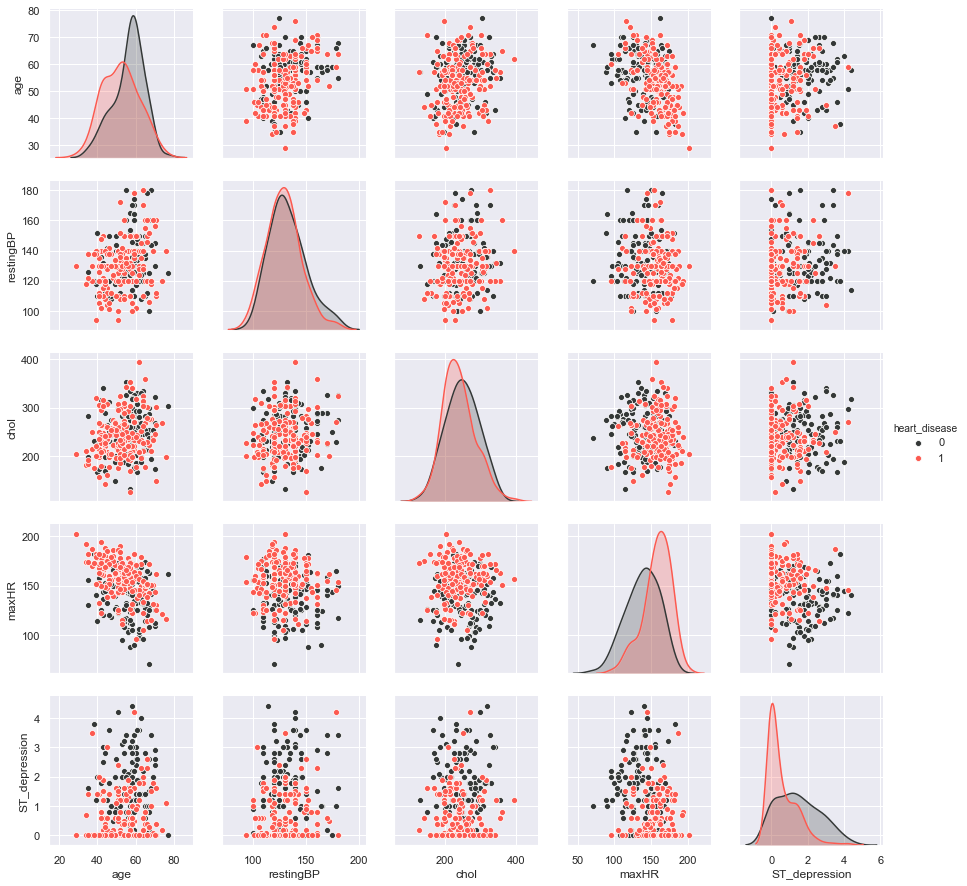

In [11]:
# Plot with only continuous data
a = sns.pairplot(heart, vars=['age', 'restingBP', 'chol', 'maxHR', 'ST_depression'], palette=char_coral, hue='heart_disease')

plt.rcParams['figure.figsize'] = (20, 20)

### Correlation heatmap of all features

Text(0.5, 1, 'Heatmap of Correlations')

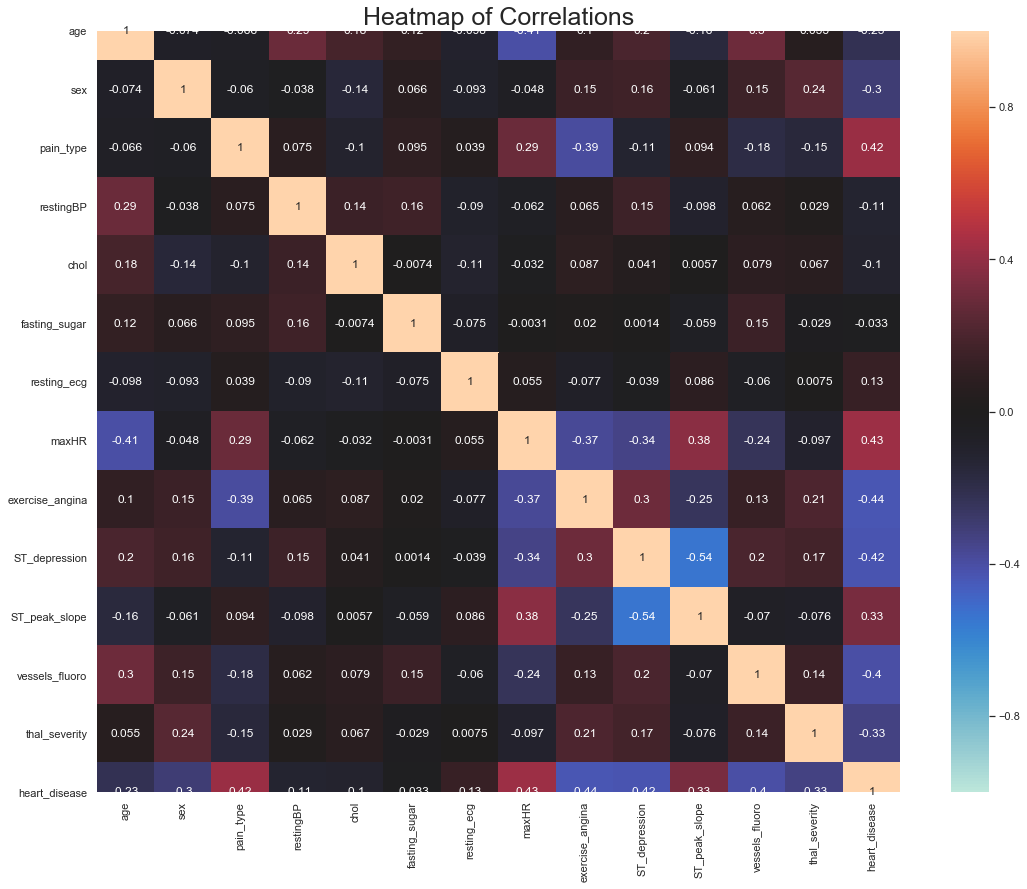

In [40]:
corr = heart.corr()
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, center=0, annot=True)
ax.set_title("Heatmap of Correlations", size=25)

I can spot several moderate correlations from the heatmap between the target feature and others, I will focus the remainder of my analysis on the following features and their relationship to the target (features with corr > (+/-)0.40:

* Pain Type (pain_type)
* Maximum Heart Rate Achieved (maxHR)
* Exercise-Induced Angina (exercise_angina)
* ST Segment Depression (ST_depression)
* Majors Vessels Colored by Fluoroscopy (vessels_fluoro)

I will also include distributions of age and sex in this dataset for a visual overview of the sample population.

### Distribution of age and sex

Text(0.5, 1.0, 'Distribution of Ages')

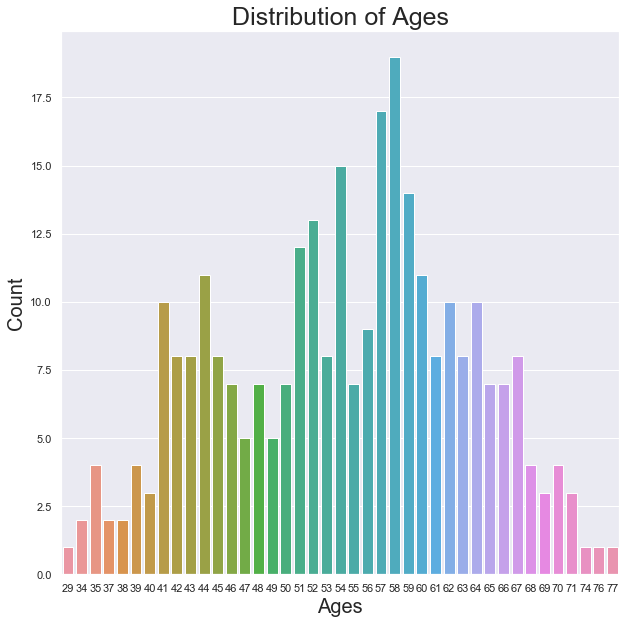

In [30]:
# Bar chart distribution of ages
a = sns.countplot('age', data=heart)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Ages', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Ages', fontsize=25)

([<matplotlib.axis.XTick at 0x27355cb9ba8>,
 <a list of 2 Text xticklabel objects>)

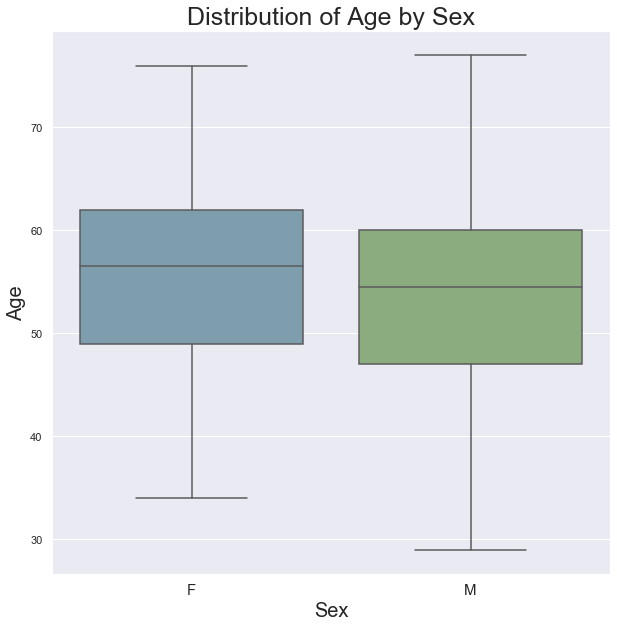

In [21]:
# Boxplot of age by sex
sns.boxplot(x='sex', y='age', data=heart, palette=blue_sage)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title('Distribution of Age by Sex', fontsize=25)
plt.xticks([0, 1], ['F', 'M'], fontsize=15)

([<matplotlib.axis.XTick at 0x273553379e8>,
 <a list of 2 Text xticklabel objects>)

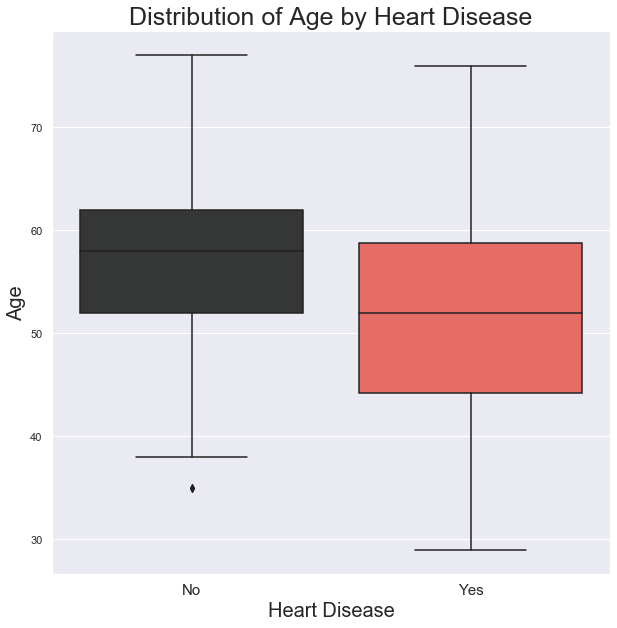

In [20]:
# Boxplot of age by heart disease
sns.boxplot(x='heart_disease', y='age', data=heart, palette=char_coral)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title('Distribution of Age by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)

([<matplotlib.axis.XTick at 0x27356c39b70>,
 <a list of 2 Text xticklabel objects>)

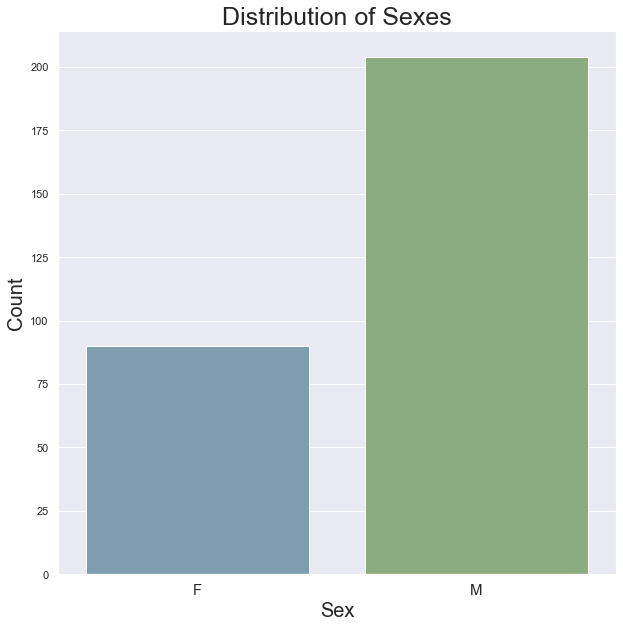

In [24]:
# Bar chart distribution of sexes
a = sns.countplot('sex', data=heart, palette=blue_sage)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Sexes', fontsize=25)
plt.xticks([0, 1], ['F', 'M'], fontsize=15)

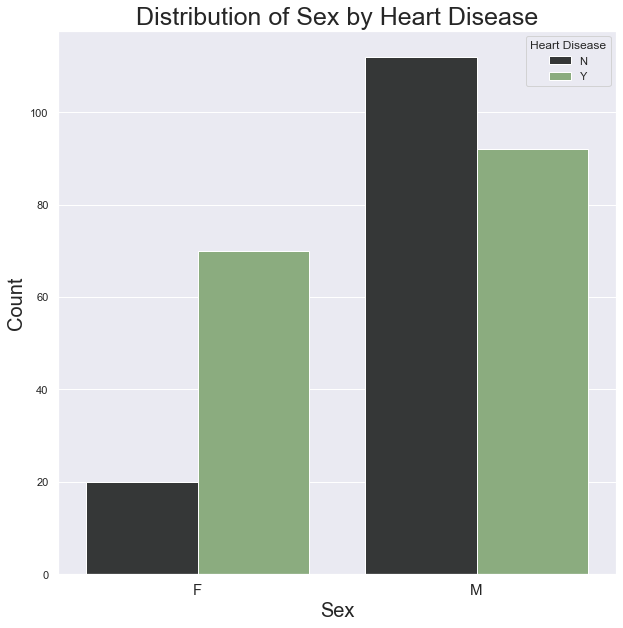

In [22]:
# Bar chart of sex by heart disease
a = sns.countplot('sex', data=heart, hue='heart_disease', palette=char_sage)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Sex by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['F', 'M'], fontsize=15)
a.legend('N'+'Y', title='Heart Disease')

### Pain type x heart disease

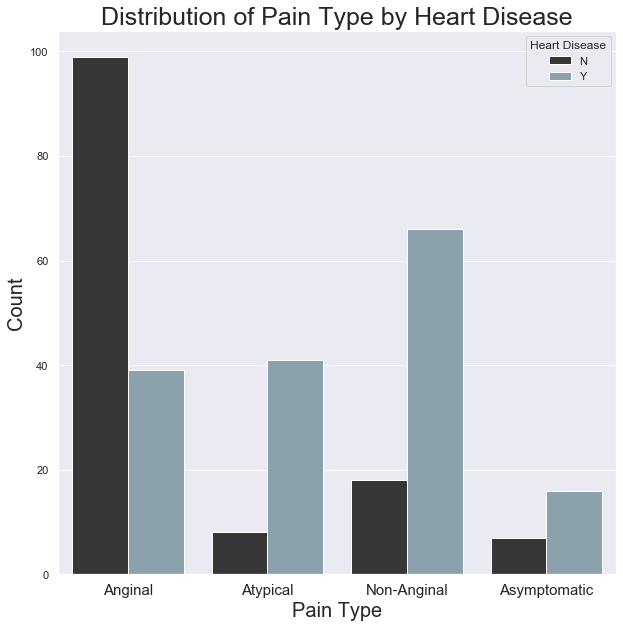

In [31]:
# Bar chart of pain types, colored by heart disease
a = sns.countplot(x='pain_type', hue='heart_disease', data=heart, palette=char_blue)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Pain Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Pain Type by Heart Disease', fontsize=25)
plt.xticks([0, 1, 2, 3], ['Anginal', 'Atypical', 'Non-Anginal', 'Asymptomatic'], fontsize=15)
a.legend('N'+'Y', title='Heart Disease')

### Maximum heart rate x heart disease

([<matplotlib.axis.XTick at 0x273548835f8>,
 <a list of 2 Text xticklabel objects>)

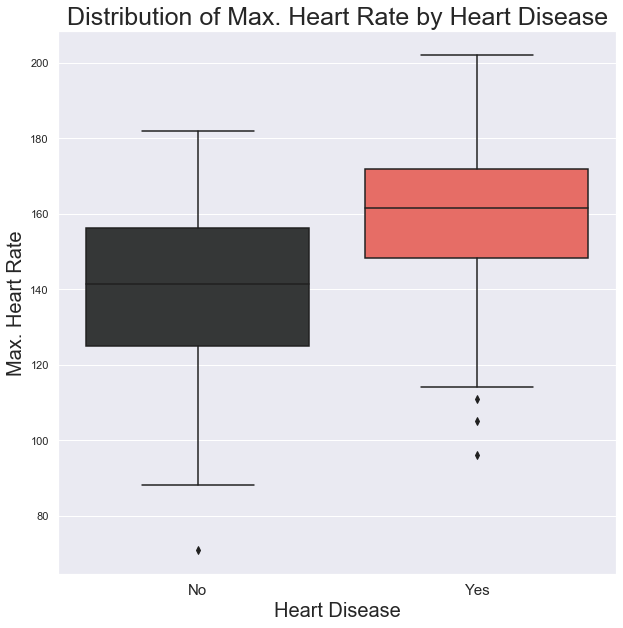

In [32]:
# Box plot of maximum heart rates achieved through exercise, colored by heart disease
sns.boxplot(x='heart_disease', y='maxHR', data=heart, palette=char_coral)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Max. Heart Rate', fontsize=20)
plt.title('Distribution of Max. Heart Rate by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)

### Exercised-induced angina x heart disease

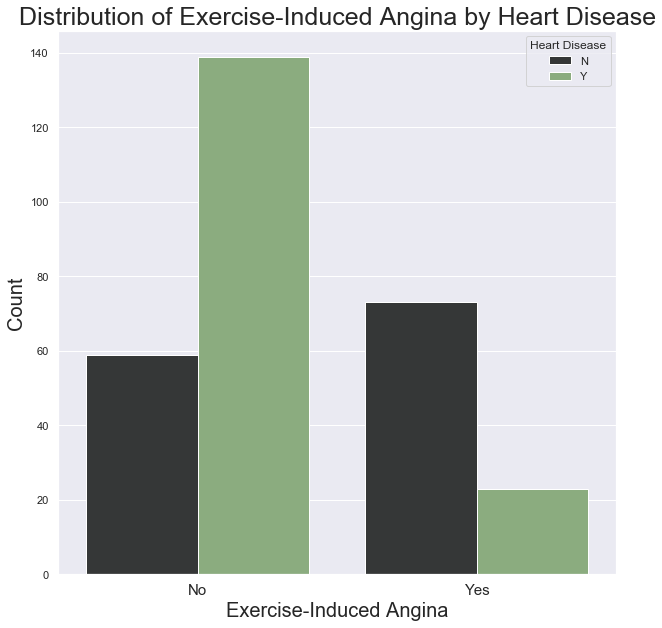

In [33]:
# Bar chart of exercise-induced angina, colored by heart disease
a = sns.countplot('exercise_angina', hue='heart_disease', palette=sns.color_palette(char_sage), data=heart)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Exercise-Induced Angina', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Exercise-Induced Angina by Heart Disease', fontsize=25)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=15)
a.legend("N"+"Y", title="Heart Disease")

### ST curve depression x heart disease

In [34]:
# Bucket ST_depression values for better visualization
ST_dep_bins = heart['ST_depression'].apply(lambda x: 0 if x < .50
                                        else 1 if x < 1.5
                                        else 2 if x < 2.5
                                        else 3 if x < 3.5
                                        else 4)

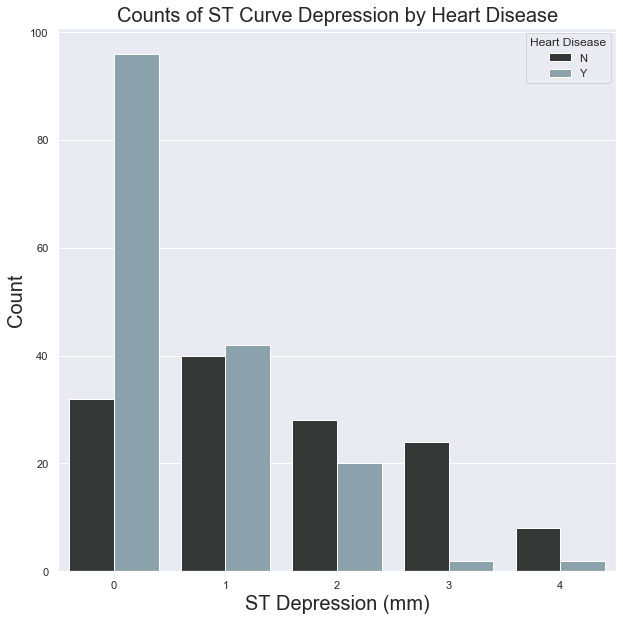

In [39]:
# Histogram of ST_depression bucketed values, colored by heart disease
a = sns.countplot(ST_dep_bins, hue='heart_disease', palette=char_blue, data=heart)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('ST Depression (mm)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Counts of ST Curve Depression by Heart Disease', size=20)
a.legend('N'+'Y', title='Heart Disease')

### Major vessels under fluoroscopy x heart disease

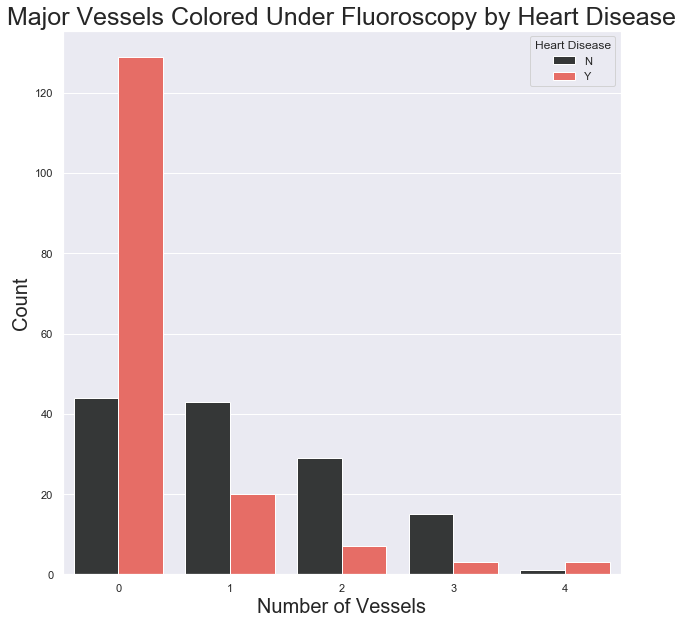

In [38]:
# Bar chart of number of major vessels colored by fluoroscopy, colored by heart disease
a = sns.countplot('vessels_fluoro', hue='heart_disease', palette=char_coral, data=heart)

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Number of Vessels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Major Vessels Colored Under Fluoroscopy by Heart Disease', fontsize=25)
a.legend('N'+'Y', title='Heart Disease')

## iv. EDA findings

* Age and Sex
 > The distribution of ages in this dataset is fairly normal. However, there are twice as many men in this dataset than there are women. This may bias the results toward the male population.

* Pain Type (pain_type)
> There appears to be no strong correlation between different pain types among those who have heart disease. However, among those without heart disease, there is a strong tendency toward anginal pain than any other type.

* Maximum Heart Rate Achieved (maxHR)
> There is a higher mean maximum heart rate among those with heart disease. Normal maximum heart rate values rise with age, yet the mean age of those with heart disease in this dataset is lower than those without. Thus, we can assume that this feature will be useful in determining heart disease.

* Exercise-Induced Angina (exercise_angina)
> There is a strong tendency toward <i>no</i> exercise-induced angina among those with heart disease compared to those without. This is an interesting outcome and may be useful in predicting heart disease.

* ST Segment Depression (ST_depression)
> ST depression among those without heart disease is fairly evenly distributed across all values. Conversely, a large majority of those with heart disease had minimal ST curve depressions.

* Majors Vessels Colored by Fluoroscopy (vessels_fluoro)
> Nearly all those with heart disease had 0 vessels colored by fluoroscopy, while most of those without heart disease had at least one. This is likely one of the stronger predicting features in this dataset.

In [41]:
# Export cleaned dataset for modeling
heart.to_csv('heart_new.csv')

# II. Modeling

## i. Importing data and libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
plt.show()

In [45]:
heart = pd.read_csv('heart_new.csv', index_col=0)
heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ii. Modeling with unaltered features 

### Decision Tree Classifier

In [46]:
# Define features and target
X = heart.drop(columns='heart_disease')
y = heart.heart_disease

# Create decision tree function to get average score
def dtree(X, y):
    """ Takes features and target values as input and
        returns an averaged score from 1000 epochs"""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    dtree = DecisionTreeClassifier(random_state=0)
    model = dtree.fit(X_train, y_train)
    epochs = 1000
    score = []
    
    while epochs > 0:
        score.append(model.score(X_test, y_test))
        epochs -= 1
    
    return mean(score)

dt_score_one = dtree(X, y)

print("Decision Tree Accuracy Score: ", dt_score_one)

Decision Tree Accuracy Score:  0.6486486486486487


In [47]:
# Viasualize the decision tree
import pydotplus
from IPython.display import Image
from sklearn import tree

# Create classifier object
dec_tree = DecisionTreeClassifier(random_state=0)

# Train
model = dec_tree.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(dec_tree, feature_names=heart.drop(columns='heart_disease').columns.values, class_names="01")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save graph
graph.write_png("decision_tree.png")

True

![image.png]("decision_tree.png")